# Restricted Boltzmann Machine 

## RBM is a 2 layered artificial neural network with generative capabilities. They can learn a probability distribution over its set of input. 

In [1]:
import opendatasets as od
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.neural_network import BernoulliRBM
from sklearn import linear_model, metrics
from sklearn.pipeline import Pipeline
from sklearn.base import clone
from sklearn.metrics import f1_score

In [2]:
od.download("https://www.kaggle.com/lepchenkov/usedcarscatalog")

Skipping, found downloaded files in ".\usedcarscatalog" (use force=True to force download)


In [3]:
csv_file = "./usedcarscatalog/cars.csv"
df_from_csv = pd.read_csv(csv_file)
df_from_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38531 entries, 0 to 38530
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   manufacturer_name  38531 non-null  object 
 1   model_name         38531 non-null  object 
 2   transmission       38531 non-null  object 
 3   color              38531 non-null  object 
 4   odometer_value     38531 non-null  int64  
 5   year_produced      38531 non-null  int64  
 6   engine_fuel        38531 non-null  object 
 7   engine_has_gas     38531 non-null  bool   
 8   engine_type        38531 non-null  object 
 9   engine_capacity    38521 non-null  float64
 10  body_type          38531 non-null  object 
 11  has_warranty       38531 non-null  bool   
 12  state              38531 non-null  object 
 13  drivetrain         38531 non-null  object 
 14  price_usd          38531 non-null  float64
 15  is_exchangeable    38531 non-null  bool   
 16  location_region    385

In [4]:
df = df_from_csv
df.head()

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,...,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed
0,Subaru,Outback,automatic,silver,190000,2010,gasoline,False,gasoline,2.5,...,True,True,True,False,True,False,True,True,True,16
1,Subaru,Outback,automatic,blue,290000,2002,gasoline,False,gasoline,3.0,...,True,False,False,True,True,False,False,False,True,83
2,Subaru,Forester,automatic,red,402000,2001,gasoline,False,gasoline,2.5,...,True,False,False,False,False,False,False,True,True,151
3,Subaru,Impreza,mechanical,blue,10000,1999,gasoline,False,gasoline,3.0,...,False,False,False,False,False,False,False,False,False,86
4,Subaru,Legacy,automatic,black,280000,2001,gasoline,False,gasoline,2.5,...,True,False,True,True,False,False,False,False,True,7


In [5]:
df_x = df[["feature_0","feature_1","feature_2","feature_3","feature_4","feature_5","feature_6","feature_7","feature_8","feature_9"]]
df_x

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9
0,False,True,True,True,False,True,False,True,True,True
1,False,True,False,False,True,True,False,False,False,True
2,False,True,False,False,False,False,False,False,True,True
3,True,False,False,False,False,False,False,False,False,False
4,False,True,False,True,True,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...
38526,False,True,False,False,True,True,False,False,True,True
38527,False,True,False,False,True,True,False,False,True,True
38528,False,True,False,False,True,True,False,False,True,True
38529,False,True,False,False,False,False,False,False,False,True


In [6]:
df_y = df["manufacturer_name"]
df_y

0          Subaru
1          Subaru
2          Subaru
3          Subaru
4          Subaru
           ...   
38526    Chrysler
38527    Chrysler
38528    Chrysler
38529    Chrysler
38530    Chrysler
Name: manufacturer_name, Length: 38531, dtype: object

In [7]:
oe = OrdinalEncoder()
oe.fit(df_x)
X_enc = oe.transform(df_x)
X_enc.shape

(38531, 10)

In [8]:
df_y = df_y.values.reshape(-1,1)
oe.fit(df_y)
Y_enc = oe.transform(df_y)
Y_decoded = oe.inverse_transform(Y_enc)
Y_decoded.shape

(38531, 1)

In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(X_enc, Y_decoded, test_size = 0.2)

In [10]:
logistic = linear_model.LogisticRegression(solver = "lbfgs", tol = 1, C = 1.0, class_weight = None, dual = False, fit_intercept = True, intercept_scaling = 1, l1_ratio = None, max_iter = 100, multi_class = 'multinomial', n_jobs = None, penalty = 'l2', random_state = None, warm_start = True)
rbm = BernoulliRBM(random_state = 0, verbose = False, learning_rate = 50, n_iter = 20, n_components = 1000, batch_size = 10)
rbm_features_classifier = Pipeline(steps = [("rbm",rbm),("logistic",logistic)])

In [11]:
rbm_features_classifier.fit(X_train, Y_train)

C:\Users\z004ek3a\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Pipeline(steps=[('rbm',
                 BernoulliRBM(learning_rate=50, n_components=1000, n_iter=20,
                              random_state=0, verbose=False)),
                ('logistic',
                 LogisticRegression(multi_class='multinomial', tol=1,
                                    warm_start=True))])

In [12]:
raw_pixel_classifier = clone(logistic)
raw_pixel_classifier.C = 700
raw_pixel_classifier.fit(X_train, Y_train)

C:\Users\z004ek3a\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\z004ek3a\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression(C=700, multi_class='multinomial', tol=1, warm_start=True)

In [13]:
Y_pred = rbm_features_classifier.predict(X_test)
print(
    "Logistic regression using RBM features:\n%s\n"
    % (metrics.classification_report(Y_test, Y_pred))
)

Logistic regression using RBM features:
               precision    recall  f1-score   support

        Acura       0.00      0.00      0.00        17
   Alfa Romeo       0.00      0.00      0.00        38
         Audi       0.00      0.00      0.00       499
          BMW       0.00      0.00      0.00       527
        Buick       0.00      0.00      0.00         6
     Cadillac       0.00      0.00      0.00        11
        Chery       0.00      0.00      0.00        10
    Chevrolet       0.00      0.00      0.00        96
     Chrysler       0.00      0.00      0.00        76
      Citroen       0.00      0.00      0.00       311
        Dacia       0.00      0.00      0.00        14
       Daewoo       0.00      0.00      0.00        45
        Dodge       0.00      0.00      0.00        59
         Fiat       0.00      0.00      0.00       191
         Ford       0.00      0.00      0.00       483
        Geely       0.00      0.00      0.00        17
   Great Wall       0.00

C:\Users\z004ek3a\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\z004ek3a\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\z004ek3a\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

In [14]:
Y_pred = raw_pixel_classifier.predict(X_test)
print(
    "Logistic regression using raw pixel features:\n%s\n"
    % (metrics.classification_report(Y_test, Y_pred))
)

Logistic regression using raw pixel features:
               precision    recall  f1-score   support

        Acura       0.00      0.00      0.00        17
   Alfa Romeo       0.00      0.00      0.00        38
         Audi       0.13      0.04      0.06       499
          BMW       0.20      0.55      0.29       527
        Buick       0.00      0.00      0.00         6
     Cadillac       0.00      0.00      0.00        11
        Chery       0.00      0.00      0.00        10
    Chevrolet       0.00      0.00      0.00        96
     Chrysler       0.00      0.00      0.00        76
      Citroen       0.10      0.03      0.04       311
        Dacia       0.00      0.00      0.00        14
       Daewoo       0.00      0.00      0.00        45
        Dodge       0.00      0.00      0.00        59
         Fiat       0.00      0.00      0.00       191
         Ford       0.03      0.00      0.00       483
        Geely       0.00      0.00      0.00        17
   Great Wall     

C:\Users\z004ek3a\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\z004ek3a\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\z004ek3a\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

# ---------------------------------------------

In [15]:
Y_pred = raw_pixel_classifier.predict(X_test[0].reshape(1,-1))
Y_pred, Y_test[0]

(array(['Renault'], dtype=object), array(['Opel'], dtype=object))

In [16]:
Y_test[0]

array(['Opel'], dtype=object)

In [17]:
Y_test, len(Y_test) 

(array([['Opel'],
        ['Audi'],
        ['Nissan'],
        ...,
        ['Chevrolet'],
        ['BMW'],
        ['ВАЗ']], dtype=object),
 7707)

In [18]:
#Top 10 most recent CMD leading up to the consequents will then be compared to the ground truth consequents
X_test[1]
X_test[2]
X_test[3]
X_test[4]
X_test[5]
X_test[6]
X_test[7]
X_test[8]
X_test[9]
X_test[10]

Y_pred_1 = raw_pixel_classifier.predict(X_test[1].reshape(1,-1))
Y_pred_2 = raw_pixel_classifier.predict(X_test[2].reshape(1,-1))
Y_pred_3 = raw_pixel_classifier.predict(X_test[3].reshape(1,-1))
Y_pred_4 = raw_pixel_classifier.predict(X_test[4].reshape(1,-1))
Y_pred_5 = raw_pixel_classifier.predict(X_test[5].reshape(1,-1))
Y_pred_6 = raw_pixel_classifier.predict(X_test[6].reshape(1,-1))
Y_pred_7 = raw_pixel_classifier.predict(X_test[7].reshape(1,-1))
Y_pred_8 = raw_pixel_classifier.predict(X_test[8].reshape(1,-1))
Y_pred_9 = raw_pixel_classifier.predict(X_test[9].reshape(1,-1))
Y_pred_10 = raw_pixel_classifier.predict(X_test[10].reshape(1,-1))
Y_pred_1, Y_pred_2, Y_pred_3, Y_pred_4, Y_pred_5, Y_pred_6, Y_pred_7, Y_pred_8, Y_pred_9, Y_pred_10
Y_test[1], Y_test[2], Y_test[3], Y_test[4], Y_test[5], Y_test[6], Y_test[7], Y_test[8], Y_test[9], Y_test[10]
#obtain 10 F1-scores and choose the top 5

(array(['Audi'], dtype=object),
 array(['Nissan'], dtype=object),
 array(['Skoda'], dtype=object),
 array(['Mercedes-Benz'], dtype=object),
 array(['Audi'], dtype=object),
 array(['Renault'], dtype=object),
 array(['Mercedes-Benz'], dtype=object),
 array(['Skoda'], dtype=object),
 array(['Ford'], dtype=object),
 array(['Skoda'], dtype=object))

In [19]:
#compare the top 1,2,3,4,5 with Y_pred

In [20]:
od.download("https://www.kaggle.com/sumanthvrao/daily-climate-time-series-data")

Skipping, found downloaded files in ".\daily-climate-time-series-data" (use force=True to force download)


In [21]:
csv_train = "./daily-climate-time-series-data/DailyDelhiClimateTrain.csv"
csv_test = "./daily-climate-time-series-data/DailyDelhiClimateTest.csv"
df_train = pd.read_csv(csv_train)
df_test = pd.read_csv(csv_test)

In [22]:
df_train.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


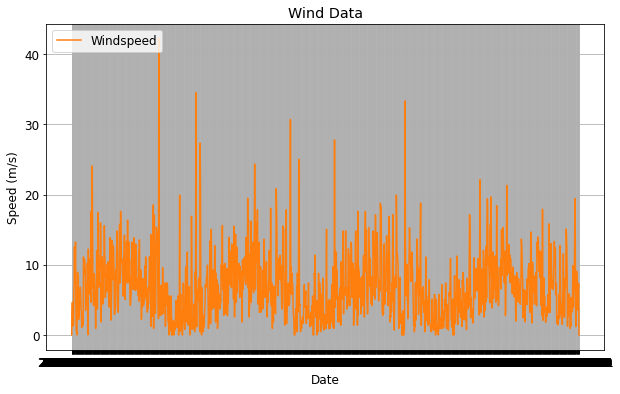

In [23]:
import matplotlib.pyplot as plt

plt.rc('font', size=12)
fig, ax = plt.subplots(figsize=(10, 6))

# Specify how our lines should look
ax.plot(df_train.date, df_train.wind_speed, color='tab:orange', label='Windspeed')

# Same as above
ax.set_xlabel('Date')
ax.set_ylabel('Speed (m/s)')
ax.set_title('Wind Data')
ax.grid(True)
ax.legend(loc='upper left');

In [24]:
from sklearn.preprocessing import KBinsDiscretizer

In [25]:
est = KBinsDiscretizer(n_bins = 3, encode='ordinal', strategy='uniform')

In [26]:
df_train = df_train.drop(["date", "meanpressure", "humidity", "meantemp"], axis = 1)
est.fit(df_train)

KBinsDiscretizer(encode='ordinal', n_bins=3, strategy='uniform')

In [27]:
Xt = est.transform(df_train)
df_train

,wind_speed
0,0.000000
1,2.980000
2,4.633333
3,1.233333
4,3.700000
...,...
1457,3.547826
1458,6.000000
1459,6.266667
1460,7.325000


In [28]:
Xt

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])